# Single Leptoquark Analysis 

In [1]:
import os   
import ROOT
from ROOT import *

dir_path = os.path.abspath('')
fullAnalysis = True

print(dir_path)

Welcome to JupyROOT 6.25/01
/mnt/Data/MadFolder/lq_mzp500_mlq500


In [2]:
class JetVector():
    def __init__(self, event, j):
        self.TLV=TLorentzVector()
        self.TLV.SetPtEtaPhiM(#getparameters jet
            event.GetLeaf("Jet.PT").GetValue(j), 
            event.GetLeaf("Jet.Eta").GetValue(j), 
            event.GetLeaf("Jet.Phi").GetValue(j), 
            event.GetLeaf("Jet.Mass").GetValue(j)
        )
        self.Q = event.GetLeaf("Jet.Charge").GetValue(j)
        self.BTag   = event.GetLeaf("Jet.BTag").GetValue(j)
        self.TauTag = event.GetLeaf("Jet.TauTag").GetValue(j)


In [3]:
def PT(jet):
    return jet.TLV.Pt()

def getJets(event):
    jets = []
    b_jets = []
    tau_jets = []
    all_jets = []
    other_jets=[]
    n_jets=event.Jet.GetEntries()
    for j in range(n_jets):
        jet=JetVector(event, j)
        if not (jet.TLV.Pt()> 20.): continue
        if( jet.BTag==0 and jet.TauTag==0):
            if (abs(jet.TLV.Pt())>20.0 ):
                jets.append(jet)
                all_jets.append(jet)
        elif( jet.BTag==1 and jet.TauTag==0): 
            if ( abs(jet.TLV.Eta())<2.4 ):
                b_jets.append(jet)
                all_jets.append(jet)
        elif( jet.BTag==0 and jet.TauTag==1): 
            if ( abs(jet.TLV.Eta())<2.4 ):
                tau_jets.append(jet)
                all_jets.append(jet)
        else: 
            other_jets.append(jet)
            all_jets.append(jet)
    jets.sort      ( reverse = True , key=PT )
    b_jets.sort    ( reverse = True , key=PT )
    tau_jets.sort  ( reverse = True , key=PT )
    all_jets.sort  ( reverse = True , key=PT )
    other_jets.sort( reverse = True , key=PT )
    return all_jets, jets, b_jets, tau_jets, other_jets

In [4]:
def DeltaR(v1,v2):
    return v1.TLV.DeltaR(v2.TLV)

def DeltaEta(v1,v2):
    return v1.TLV.Eta() - v2.TLV.Eta()

def DeltaPhi(v1,v2):
    return v1.TLV.Phi() - v2.TLV.Phi()

def sDeltaPT(v1,v2):
    return PT(v1) - PT(v2)

In [5]:
jobs=0
dir_name = os.getcwd() + "/Events"

#Read how many runs in /Events
if (fullAnalysis): 
    dirs = next(os.walk(dir_name))[1]
    jobs = len(dirs)
else: jobs=1


In [6]:
tree = TChain("Delphes;1")
for ind in range(1,jobs+1):
    directory= str("Events/run_" + '%02d' % ind +"/tag_1_delphes_events.root")
    print("Run found in "+ directory)
    tree.Add(directory)
print(tree.GetEntries())

Run found in Events/run_01/tag_1_delphes_events.root
Run found in Events/run_02/tag_1_delphes_events.root
Run found in Events/run_03/tag_1_delphes_events.root
Run found in Events/run_04/tag_1_delphes_events.root
Run found in Events/run_05/tag_1_delphes_events.root
Run found in Events/run_06/tag_1_delphes_events.root
Run found in Events/run_07/tag_1_delphes_events.root
Run found in Events/run_08/tag_1_delphes_events.root
Run found in Events/run_09/tag_1_delphes_events.root
Run found in Events/run_10/tag_1_delphes_events.root
218638


Warning in <TClass::Init>: no dictionary for class HepMCEvent is available
Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Weight is available
Warning in <TClass::Init>: no dictionary for class GenParticle is available
Warning in <TClass::Init>: no dictionary for class SortableObject is available
Warning in <TClass::Init>: no dictionary for class Track is available
Warning in <TClass::Init>: no dictionary for class Tower is available
Warning in <TClass::Init>: no dictionary for class Jet is available
Warning in <TClass::Init>: no dictionary for class MissingET is available
Warning in <TClass::Init>: no dictionary for class Electron is available
Warning in <TClass::Init>: no dictionary for class Photon is available
Warning in <TClass::Init>: no dictionary for class Muon is available
Warning in <TClass::Init>: no dictionary for class ScalarHT is available


In [7]:
canvas = TCanvas("Canvas","",800,600)
canvas.SetGrid()
cutflow = TH1F("Cutflow","Cutflow; Cut; Events",10,0,10)
hist_njets = TH1F("Number of jets","n-jets; Jet multiplicity; Events",10,0,10)
hist_m_LQ=TH1F("hist_m_LQ", "M_{b tau}", 100, 0.0, 1200.0)

pt_all_jets=TH1F("pt_all_jets", "Pt_{allj}", 100, 0.0, 600.0)
eta_all_jets=TH1F("eta_all_jets", "#eta_{allj}", 100, -5, 5)
pt_all_jets.SetLineColor(kBlack)
eta_all_jets.SetLineColor(kBlack)

pt_lead_jets=TH1F("pt_lead_jets", "Pt_{j1}", 100, 0.0, 1000.0)
eta_lead_jets=TH1F("eta_lead_jets", "#eta_{j1}", 100, -5, 5)
pt_lead_jets.SetLineColor(kBlue)
eta_lead_jets.SetLineColor(kBlue)
pt_lead_bjets=TH1F("pt_lead_bjets", "Pt_{bj1}", 100, 0.0, 1000.0)
eta_lead_bjets=TH1F("eta_lead_bjets", "#eta_{bj2}", 100, -5, 5)
pt_lead_bjets.SetLineColor(kRed)
eta_lead_bjets.SetLineColor(kRed)
pt_lead_taus=TH1F("pt_lead_taus", "Pt_{tau1}", 100, 0.0, 1000.0)
eta_lead_taus=TH1F("eta_lead_taus", "#eta_tau1", 100, -5, 5)
pt_lead_taus.SetLineColor(kGreen)
eta_lead_taus.SetLineColor(kGreen)
pt_slead_taus=TH1F("pt_slead_taus", "Pt_tau2", 100, 0.0, 1000.0)
eta_slead_taus=TH1F("eta_slead_taus", "#eta_tau2", 100, -5, 5)
pt_slead_taus.SetLineColor(kViolet)
eta_slead_taus.SetLineColor(kViolet)

hist_deltar_taus=TH1F("deta_taus","#Delta R_{#tau_{1}#tau_{2}}",100,0,8) 
hist_deltar_b_ltau=TH1F("deltar_b_ltau","#Delta R_{b#tau_{1}}",100,0,8) 
hist_deltar_b_sltau=TH1F("deltar_b_sltau","#Delta R_{b#tau_{2}}",100,0,8) 
hist_deltar_j_ltau=TH1F("deltar_j_ltau","#Delta R_{j#tau_{1}}",100,0,8) 
hist_deltar_j_sltau=TH1F("deltar_j_sltau","#Delta R_{j#tau_{2}}",100,0,8) 
hist_deltar_b_j=TH1F("deltar_b_j","#Delta R_{bj}",100,0,8)

hist_deltaEta_taus=TH1F("deltaEta_taus","#Delta #eta_{#tau_{1}#tau_{2}}",100,-5,5)
hist_deltaEta_b_ltau=TH1F("deltaEta_b_ltau","#Delta #eta_{b#tau_{1}}",100,-5,5) 
hist_deltaEta_b_sltau=TH1F("deltaEta_b_sltau","#Delta #eta_{b#tau_{2}}",100,-5,5) 
hist_deltaEta_j_ltau=TH1F("deltaEta_j_ltau","#Delta #eta_{j#tau_{1}}",100,-5,5) 
hist_deltaEta_j_sltau=TH1F("deltaEta_j_sltau","#Delta #eta_{j#tau_{2}}",100,-5,5) 
hist_deltaEta_b_j=TH1F("deltaEta_b_j","#Delta #eta_{bj}",100,-5,5)

hist_deltaPhi_taus=TH1F("deltaPhi_taus","#Delta #phi_{#tau_{1}#tau_{2}}",100,-5,5) 
hist_deltaPhi_b_ltau=TH1F("deltaPhi_b_ltau","#Delta #phi_{b#tau_{1}}",100,-5,5) 
hist_deltaPhi_b_sltau=TH1F("deltaPhi_b_sltau","#Delta #phi_{b#tau_{2}}",100,-5,5) 
hist_deltaPhi_j_ltau=TH1F("deltaPhi_j_ltau","#Delta #phi_{j#tau_{1}}",100,-5,5) 
hist_deltaPhi_j_sltau=TH1F("deltaPhi_j_sltau","#Delta #phi_{j#tau_{2}}",100,-5,5) 
hist_deltaPhi_b_j=TH1F("deltaPhi_b_j","#Delta #phi_{bj}",100,-5,5)

hist_sdPT_taus=TH1F("sdPT_taus","#Delta PT_{#tau_{1}#tau_{2}}",100,0,1000) 
hist_sdPT_b_ltau=TH1F("sdPT_b_ltau","#Delta PT_{b#tau_{1}}",100,-800,800) 
hist_sdPT_b_sltau=TH1F("sdPT_b_sltau","#Delta PT_{b#tau_{2}}",100,-800,800) 
hist_sdPT_j_ltau=TH1F("sdPT_j_ltau","#Delta PT_{j#tau_{1}}",100,-800,800) 
hist_sdPT_j_sltau=TH1F("sdPT_j_sltau","#Delta PT_{j#tau_{2}}",100,-800,800) 
hist_sdPT_b_j=TH1F("sdPT_b_j","#Delta PT_{bj}",100,-800,800)

In [8]:
def FillHistos(allJ, jets, bjets, taus, other_jets):
    pt_lead_jets.Fill  ( jets[0].TLV.Pt()  )
    eta_lead_jets.Fill ( jets[0].TLV.Eta() )
    pt_lead_bjets.Fill ( bjets[0].TLV.Pt() )
    eta_lead_bjets.Fill( bjets[0].TLV.Eta())
    pt_lead_taus.Fill  ( taus[0].TLV.Pt()  )
    eta_lead_taus.Fill ( taus[0].TLV.Eta() )
    pt_slead_taus.Fill ( taus[1].TLV.Pt()  )
    eta_slead_taus.Fill( taus[1].TLV.Eta() )
    
    pt_all_jets.Fill ( bjets[0].TLV.Pt() )
    eta_all_jets.Fill( bjets[0].TLV.Eta())
    pt_all_jets.Fill ( taus[0].TLV.Pt()  )
    eta_all_jets.Fill( taus[0].TLV.Eta() )
    pt_all_jets.Fill ( taus[1].TLV.Pt()  )
    eta_all_jets.Fill( taus[1].TLV.Eta() )

    pt_all_jets.Fill ( jets[0].TLV.Pt()   )
    eta_all_jets.Fill( jets[0].TLV.Eta()  )
    hist_deltar_taus.Fill(DeltaR(taus[0],taus[1]))
    hist_deltar_b_ltau.Fill(DeltaR(taus[0],bjets[0]))
    hist_deltar_b_sltau.Fill(DeltaR(taus[1],bjets[0]))
    hist_deltar_j_ltau.Fill(DeltaR(taus[0],jets[0]))
    hist_deltar_j_sltau.Fill(DeltaR(taus[1],jets[0]))
    hist_deltar_b_j.Fill(DeltaR(bjets[0],jets[0]))

    hist_deltaEta_taus.Fill(DeltaEta(taus[0],taus[1]))
    hist_deltaEta_b_ltau.Fill(DeltaEta(taus[0],bjets[0]))
    hist_deltaEta_b_sltau.Fill(DeltaEta(taus[1],bjets[0]))
    hist_deltaEta_j_ltau.Fill(DeltaEta(taus[0],jets[0]))
    hist_deltaEta_j_sltau.Fill(DeltaEta(taus[1],jets[0]))
    hist_deltaEta_b_j.Fill(DeltaEta(bjets[0],jets[0]))

    hist_deltaPhi_taus.Fill(DeltaPhi(taus[0],taus[1]))
    hist_deltaPhi_b_ltau.Fill(DeltaPhi(taus[0],bjets[0]))
    hist_deltaPhi_b_sltau.Fill(DeltaPhi(taus[1],bjets[0]))
    hist_deltaPhi_j_ltau.Fill(DeltaPhi(taus[0],jets[0]))
    hist_deltaPhi_j_sltau.Fill(DeltaPhi(taus[1],jets[0]))
    hist_deltaPhi_b_j.Fill(DeltaPhi(bjets[0],jets[0]))

    hist_sdPT_taus.Fill(sDeltaPT(taus[0],taus[1]))
    hist_sdPT_b_ltau.Fill(sDeltaPT(taus[0],bjets[0]))
    hist_sdPT_b_sltau.Fill(sDeltaPT(taus[1],bjets[0]))
    hist_sdPT_j_ltau.Fill(sDeltaPT(taus[0],jets[0]))
    hist_sdPT_j_sltau.Fill(sDeltaPT(taus[1],jets[0]))
    hist_sdPT_b_j.Fill(sDeltaPT(bjets[0],jets[0]))
    
    P=bjets[0].TLV + taus[0].TLV
    hist_m_LQ.Fill(TMath.Sqrt(P*P))

In [9]:
for event in tree:
     
    n_jets=event.Jet.GetEntries()
    hist_njets.Fill(n_jets)
    cutflow.Fill(0)
    
    if not (n_jets>0): continue
    cutflow.Fill(1)
    
    if not (n_jets>1): continue
    cutflow.Fill(2)
    
    if not (n_jets>2): continue
    cutflow.Fill(3)
    
    if not (n_jets>3): continue
    cutflow.Fill(4)
    
    allJ, jets, bjets, taus, other_jets = getJets(event)
     
    if not (len(taus)>0): continue
    cutflow.Fill(5)
    
    if not (len(taus)>1): continue
    cutflow.Fill(6)
 
    if not (len(bjets)>0): continue
    cutflow.Fill(7)
    
    if not (len(jets)>0): continue
    cutflow.Fill(8)
    
    FillHistos(allJ, jets, bjets, taus, other_jets)
    
    

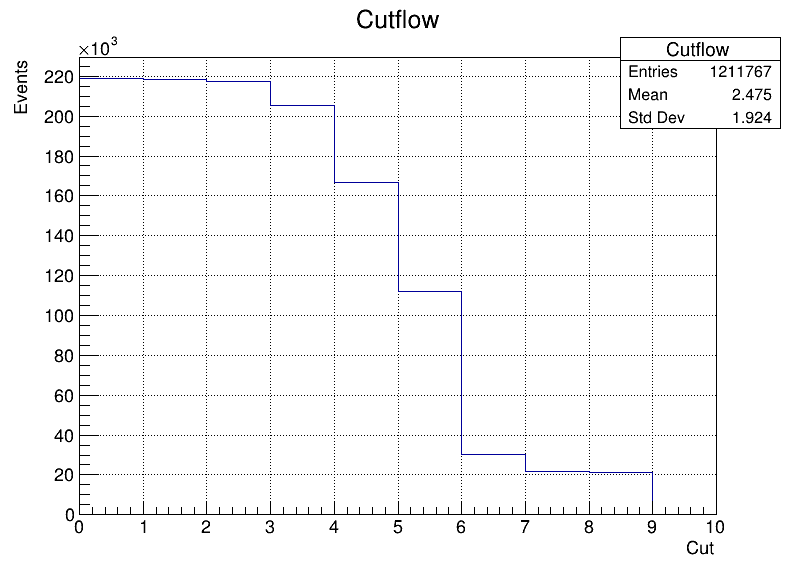

In [10]:
cutflow.Draw()
canvas.Draw()

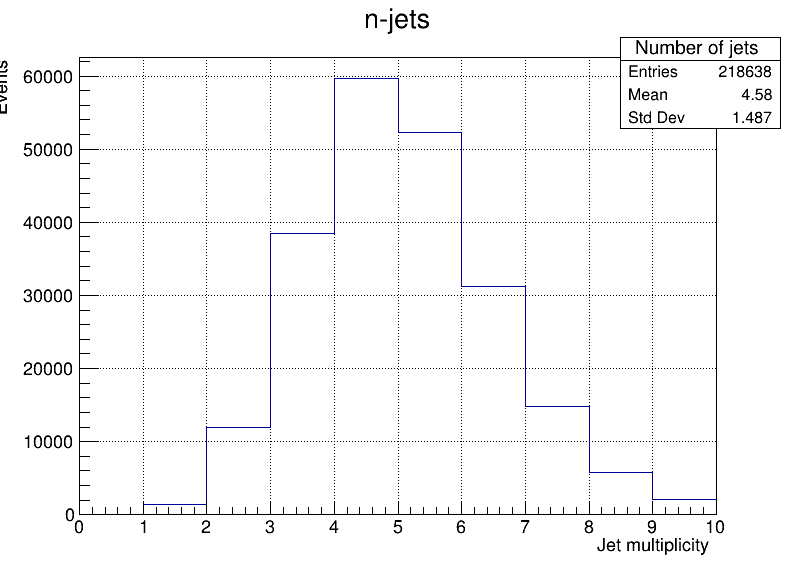

In [11]:
hist_njets.Draw()
canvas.Draw()

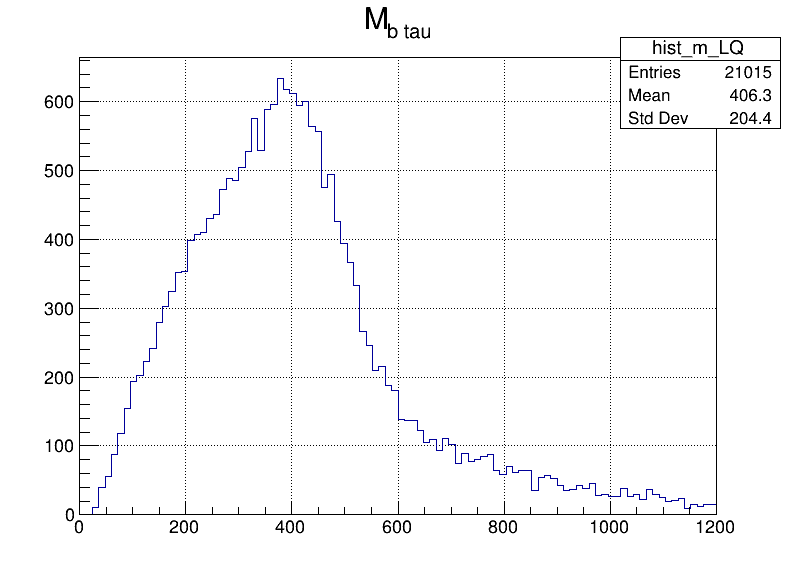

In [12]:
hist_m_LQ.Draw()
canvas.Draw()

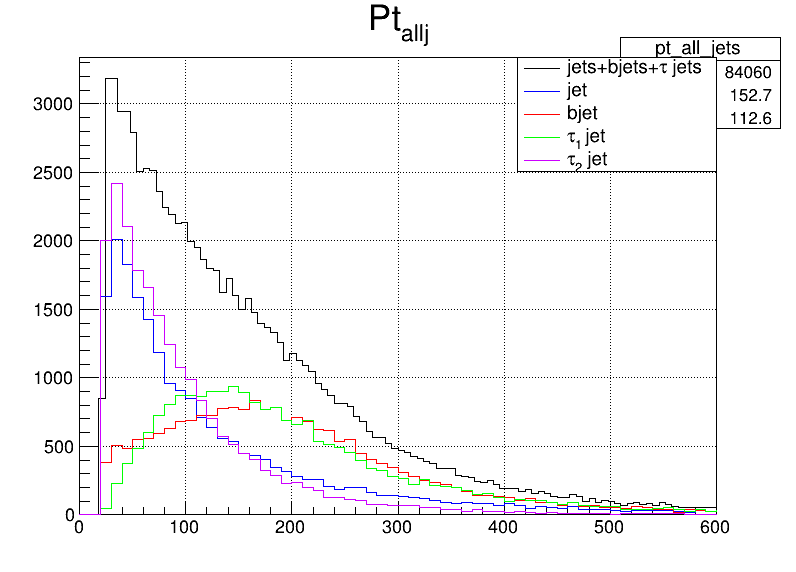

In [13]:
pt_all_jets.Draw("HIST")
pt_lead_jets.Draw("histsame")
pt_lead_bjets.Draw("histsame")
pt_lead_taus.Draw("histsame")
pt_slead_taus.Draw("histsame")

leg=ROOT.TLegend(0.9,0.9,0.65,0.70)
leg.AddEntry("pt_all_jets", "jets+bjets+#tau jets", "l")
leg.AddEntry("pt_lead_jets", "jet", "l")
leg.AddEntry("pt_lead_bjets", "bjet", "l")
leg.AddEntry("pt_lead_taus", "#tau_{1} jet", "l")
leg.AddEntry("pt_slead_taus", "#tau_{2} jet", "l")
leg.Draw()

canvas.Draw()

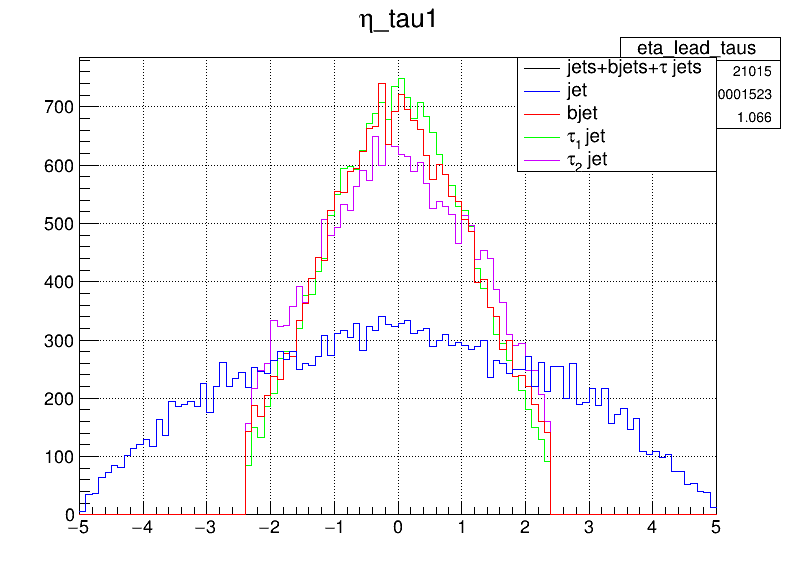

In [14]:
#eta_all_jets.Draw("HIST")
eta_lead_taus.Draw("hist")
eta_slead_taus.Draw("histsame")
eta_lead_bjets.Draw("histsame")
eta_lead_jets.Draw("histsame")
leg=ROOT.TLegend(0.9,0.9,0.65,0.70)
leg.AddEntry("eta_all_jets", "jets+bjets+#tau jets", "l")
leg.AddEntry("eta_lead_jets", "jet", "l")
leg.AddEntry("eta_lead_bjets", "bjet", "l")
leg.AddEntry("eta_lead_taus", "#tau_{1} jet", "l")
leg.AddEntry("eta_slead_taus", "#tau_{2} jet", "l")
leg.Draw()
canvas.Draw()

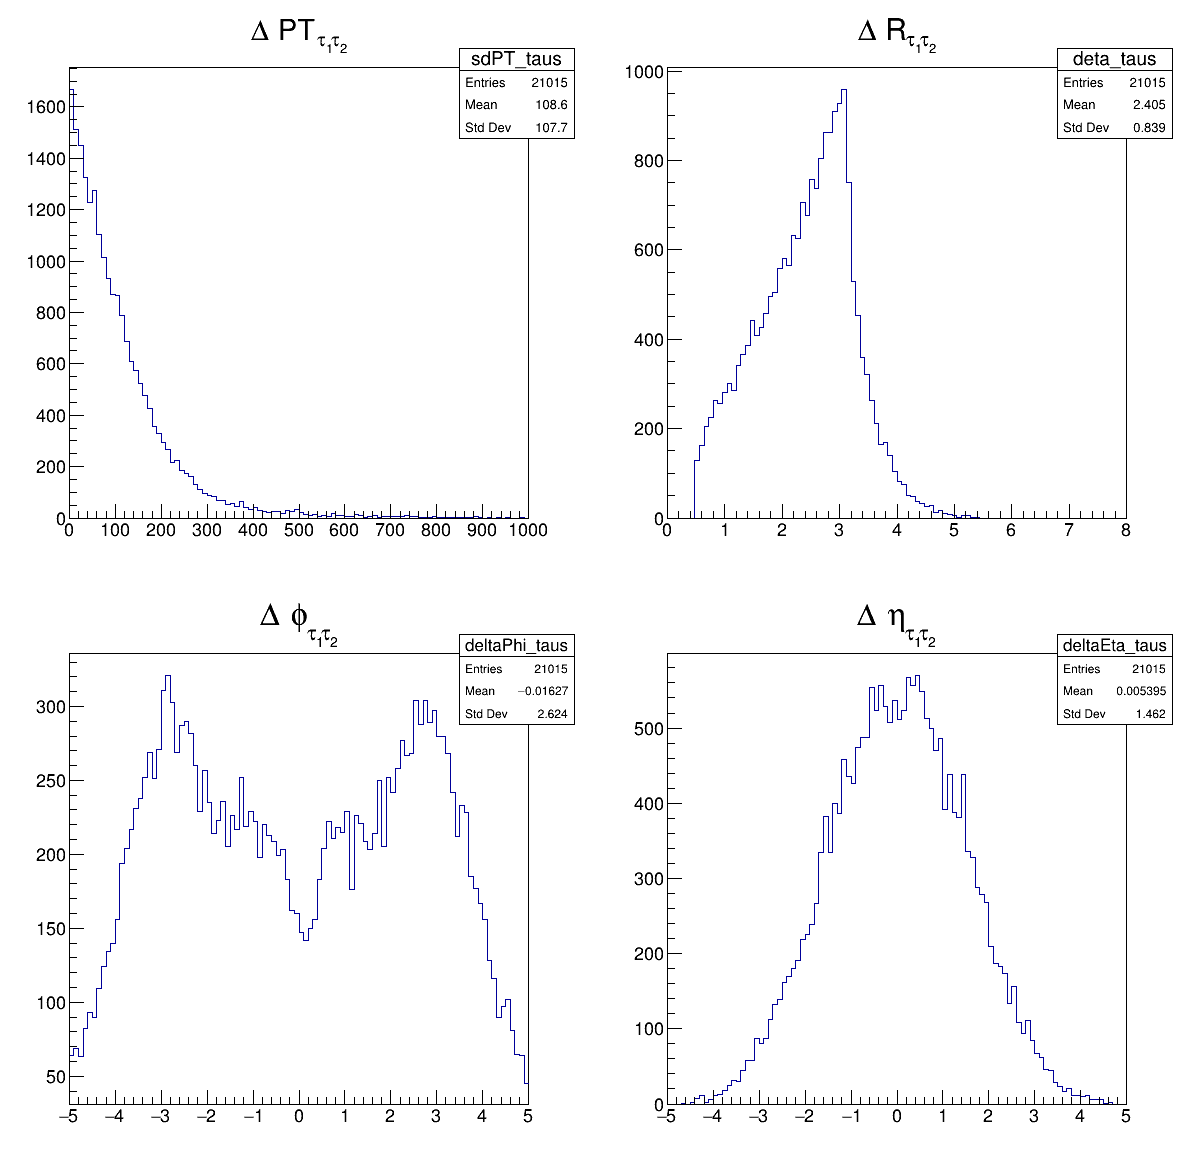

In [15]:
scanvas = TCanvas("SCanvas","",1200,1200)
scanvas.Divide(2,2)
scanvas.cd(4)
hist_deltaEta_taus.Draw("hist")
scanvas.cd(2)
hist_deltar_taus.Draw("hist")
scanvas.cd(3)
hist_deltaPhi_taus.Draw("hist")
scanvas.cd(1)
hist_sdPT_taus.Draw("hist")
scanvas.Draw()

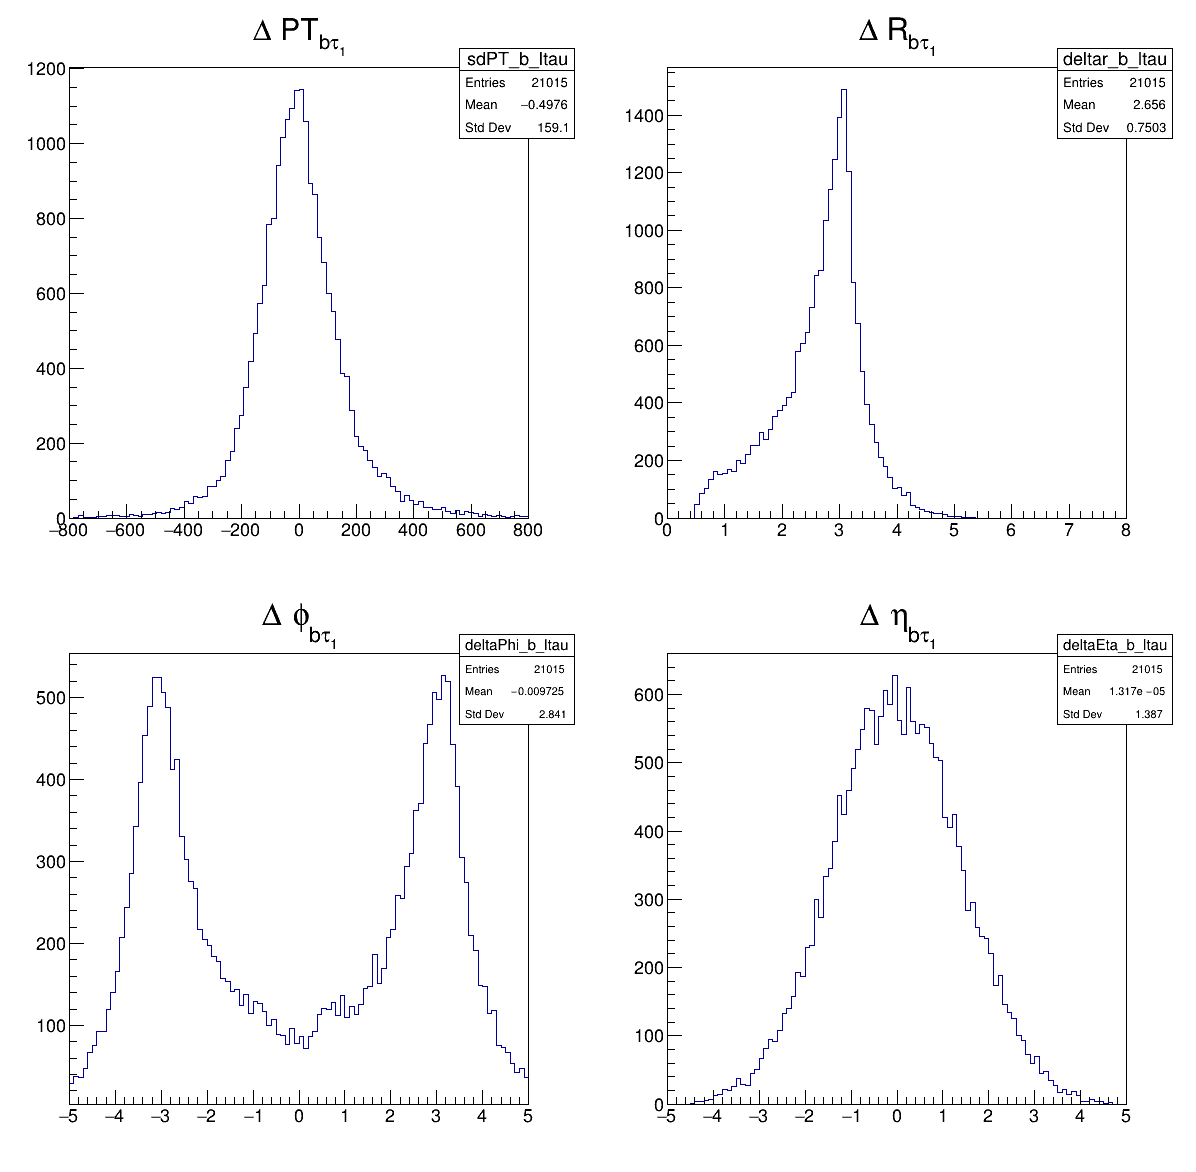

In [16]:
scanvas.cd(4)
hist_deltaEta_b_ltau.Draw("hist")
scanvas.cd(2)
hist_deltar_b_ltau.Draw("hist")
scanvas.cd(3)
hist_deltaPhi_b_ltau.Draw("hist")
scanvas.cd(1)
hist_sdPT_b_ltau.Draw("hist")
scanvas.Draw()

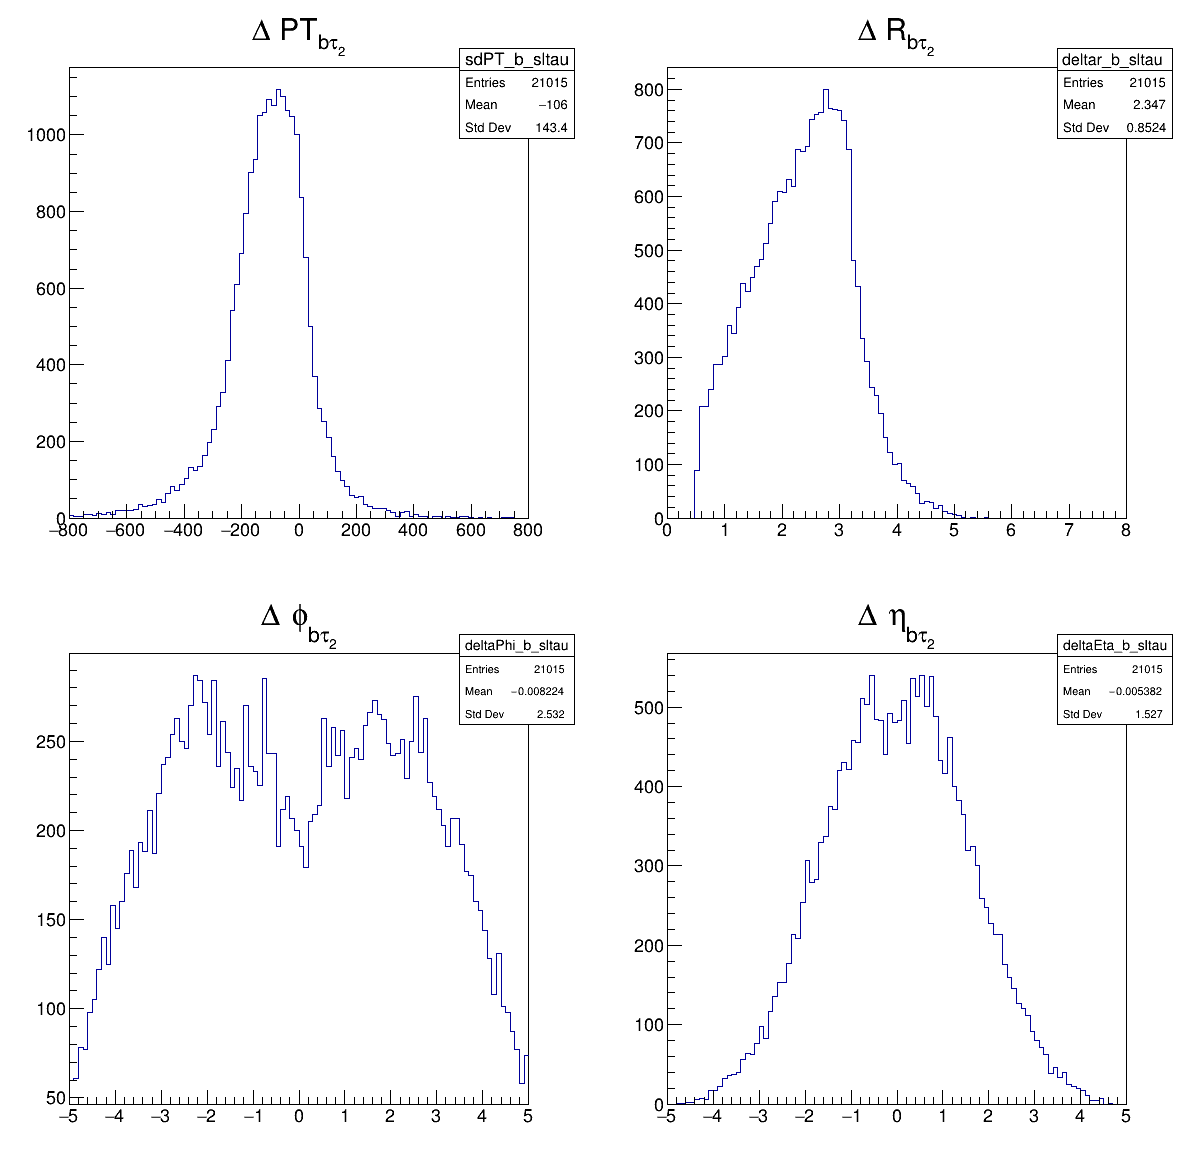

In [17]:
scanvas.cd(4)
hist_deltaEta_b_sltau.Draw("hist")
scanvas.cd(2)
hist_deltar_b_sltau.Draw("hist")
scanvas.cd(3)
hist_deltaPhi_b_sltau.Draw("hist")
scanvas.cd(1)
hist_sdPT_b_sltau.Draw("hist")
scanvas.Draw()

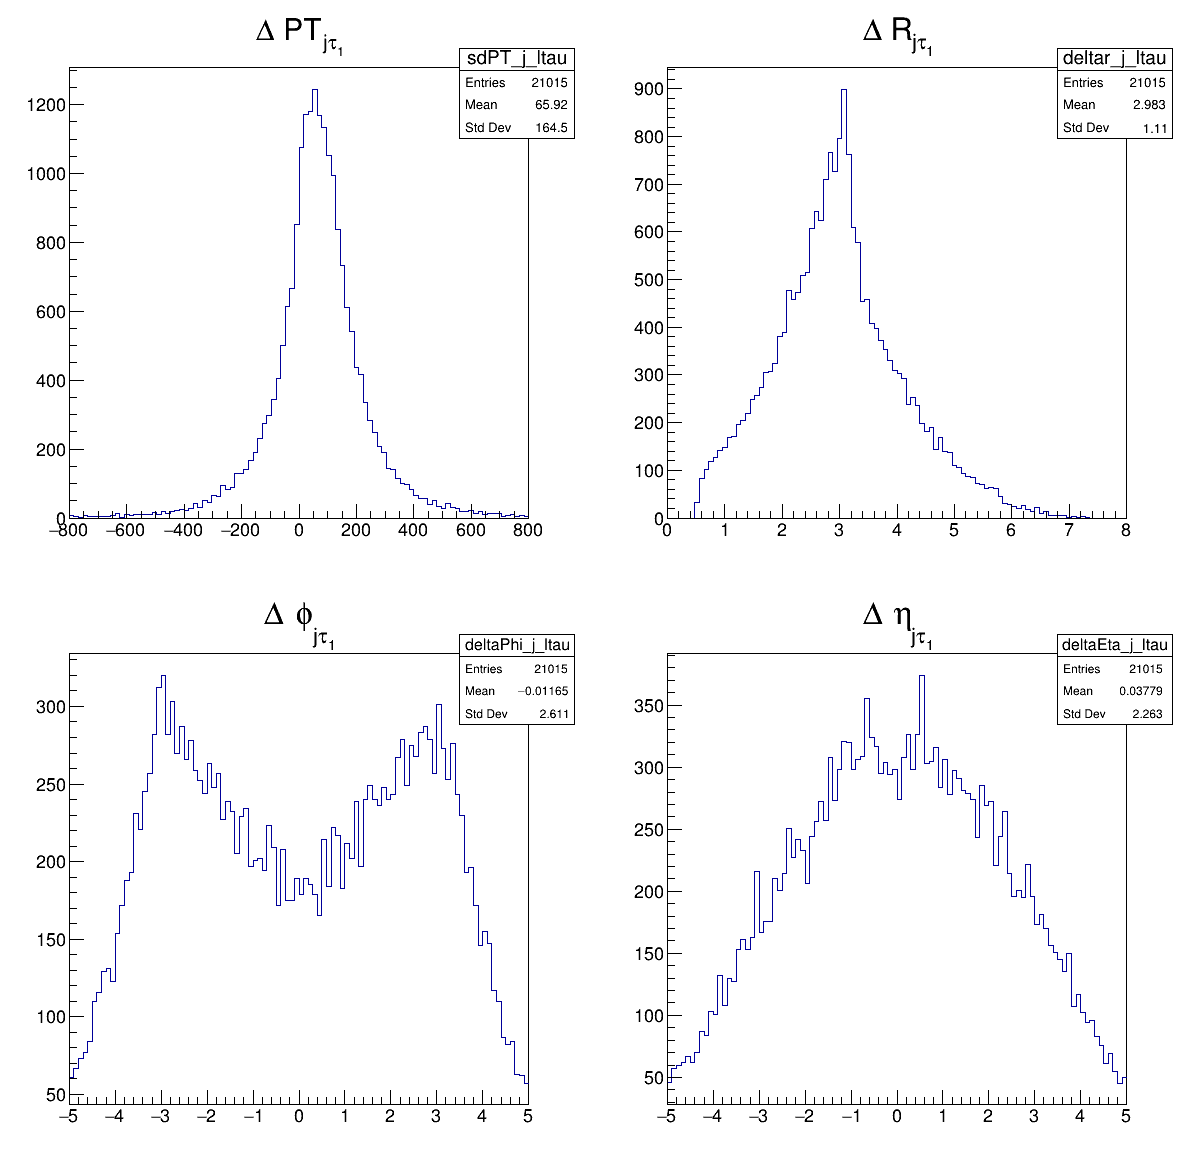

In [18]:
scanvas.cd(4)
hist_deltaEta_j_ltau.Draw("hist")
scanvas.cd(2)
hist_deltar_j_ltau.Draw("hist")
scanvas.cd(3)
hist_deltaPhi_j_ltau.Draw("hist")
scanvas.cd(1)
hist_sdPT_j_ltau.Draw("hist")
scanvas.Draw()

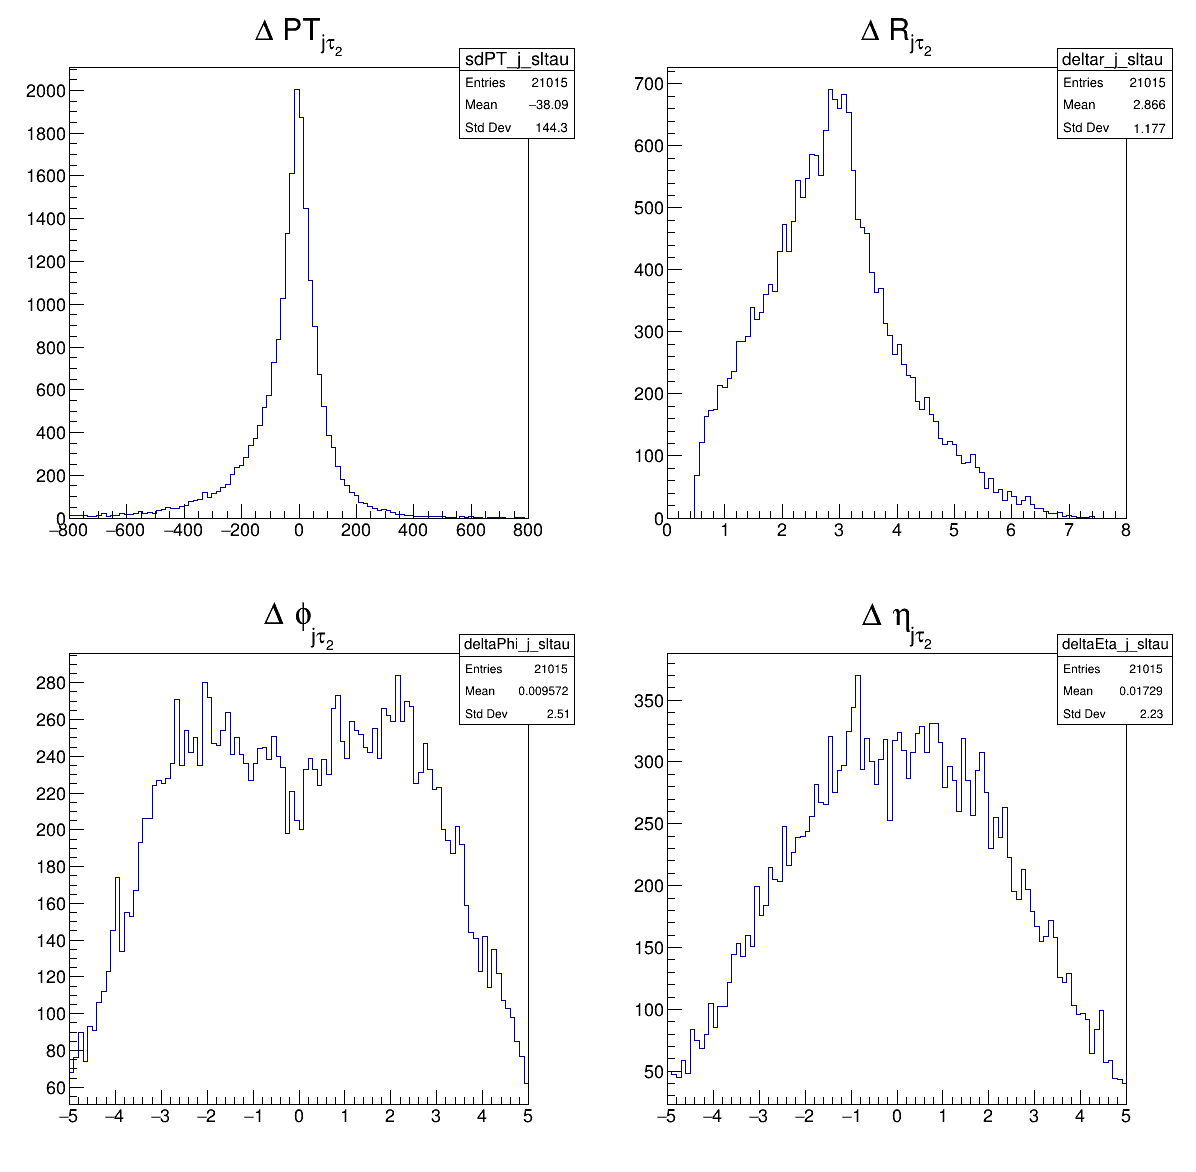

In [19]:
scanvas.cd(4)
hist_deltaEta_j_sltau.Draw("hist")
scanvas.cd(2)
hist_deltar_j_sltau.Draw("hist")
scanvas.cd(3)
hist_deltaPhi_j_sltau.Draw("hist")
scanvas.cd(1)
hist_sdPT_j_sltau.Draw("hist")
scanvas.Draw()

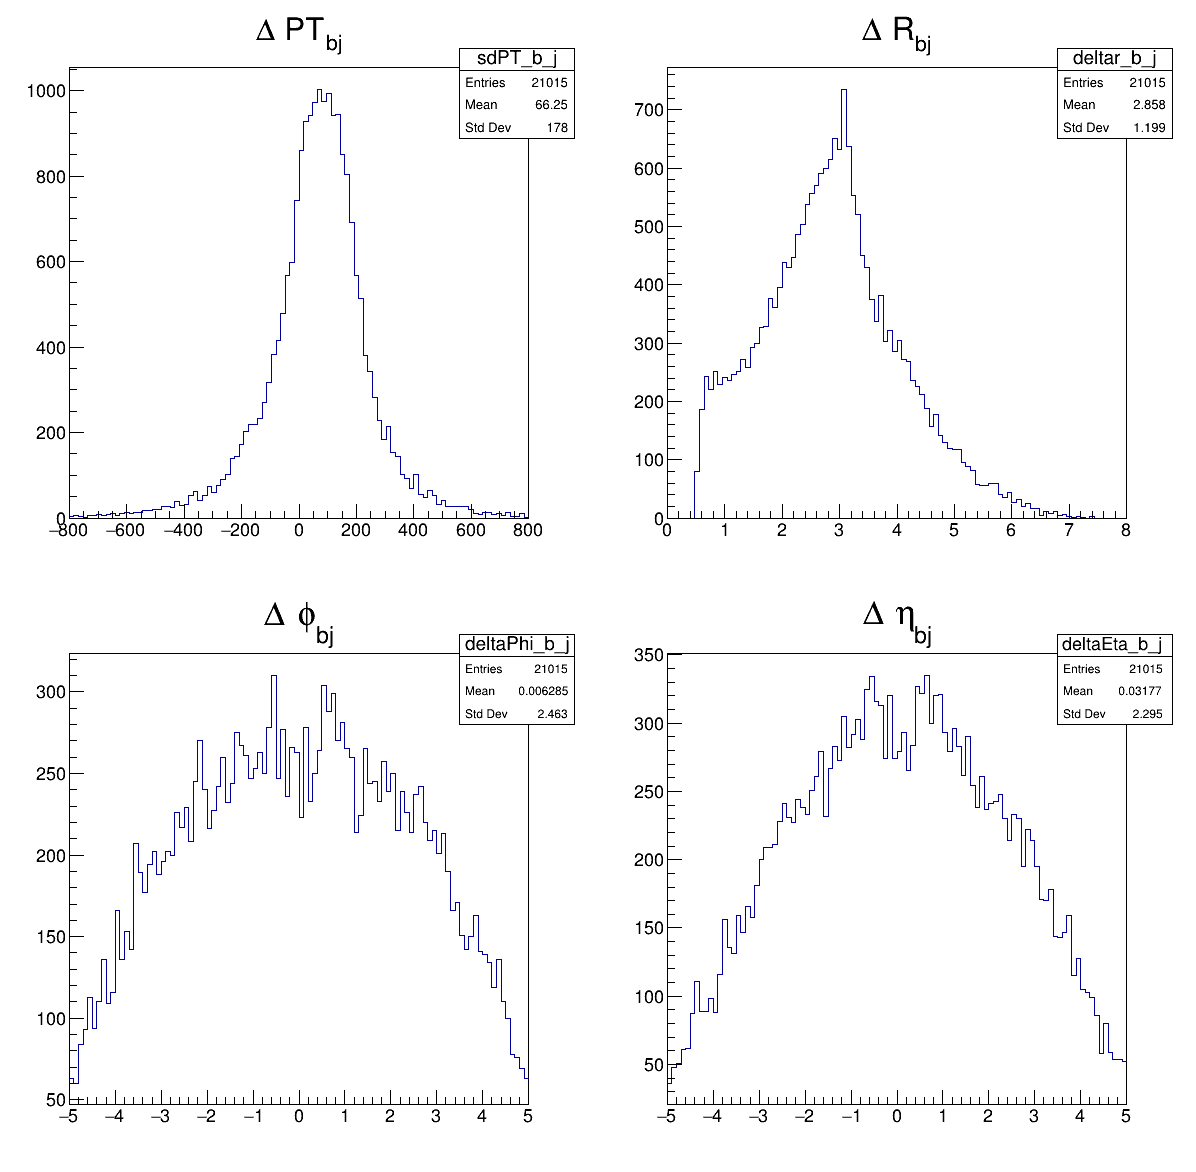

In [20]:
scanvas.cd(4)
hist_deltaEta_b_j.Draw("hist")
scanvas.cd(2)
hist_deltar_b_j.Draw("hist")
scanvas.cd(3)
hist_deltaPhi_b_j.Draw("hist")
scanvas.cd(1)
hist_sdPT_b_j.Draw("hist")
scanvas.Draw()